<a href="https://colab.research.google.com/github/nferrucho/NPL/blob/main/curso1/ciclo5/3_huggingface_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?export=view&id=1WNLKH10YpQNNk9eeRIyYLwGkxNbNp-Mm" width="100%">

# Modelos No Supervisados de Transformers
---

En este notebook veremos algunos ejemplos de modelos no supervisados con la librería `transformers` de [HuggingFace](https://huggingface.co/).

Comenzamos instalando las librerías necesarias:

In [ ]:
!pip install transformers[torch] sentencepiece sacremoses sentence-transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

Importamos las librerías necesarias:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
from IPython.display import display

## **1. Descripción General**
---

Los modelos de `transformers` se utilizan en aplicaciones no supervisadas de procesamiento de lenguaje natural, tales como: la codificación de contexto automática (*AutoEncoder*) y la tarea de agrupamiento de palabras (*Word Clustering*). En la codificación de contexto automático se entrena al modelo para que se reproduzca la entrada original, mientras que en la tarea de agrupamiento de palabras se utiliza el modelo para agrupar palabras similares en grupos. También, se pueden utilizar para tareas de generación de texto, como la generación de respuestas a preguntas o la generación de texto a partir de un resumen.

<img src="https://drive.google.com/uc?export=view&id=1Zr-35kxKbh1dI4-Twn_ZWrsILTH0L62l" width="80%">

Existen algunas aplicaciones no supervisadas que pueden realizarse con modelos pre-entrenados de `transformers`. Veamos algunos ejemplos:

## **2. Similitud Semántica**
---

La similitud semántica en procesamiento de lenguaje natural se refiere a la medida de cuán parecidos son el significado o el sentido de dos o más palabras o frases. Esto se utiliza a menudo para encontrar relaciones entre palabras en un corpus de texto o para recomendar palabras o frases similares en una aplicación de búsqueda.

<img src="https://drive.google.com/uc?export=view&id=16aEwcFj6WwzAl0GW1-O0sMYT3PrI1nUR" width="80%">

Existen diferentes técnicas para medir la similitud semántica, incluyendo el cálculo de la similitud de coseno entre vectores de palabras, el uso de diccionarios de sinónimos y antónimos, y el uso de redes neuronales para aprender representaciones semánticas de las palabras.

Veamos cómo podemos calcular la similitud semántica entre dos textos, para ello cargamos un modelo de `sentence-similarity`.

> **Nota**: esto debe realizarse con `sentence_transformers` ya que aún no existe una tarea en el `pipeline` de `transformers` para similitud entre textos:

In [ ]:
from sentence_transformers import SentenceTransformer

Cargamos el modelo:

In [ ]:
model = SentenceTransformer("symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/677 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/356 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Ahora, definimos algunos textos sobre los que evaluaremos la similitud semántica:

In [ ]:
texts = [
        "esto está muy difícil",
        "esto está muy fácil",
        "probamos algo sencillo"
        ]

Esto nos permite calcular _embeddings_ para cada uno de los textos:

In [ ]:
encodings = model.encode(texts)
display(encodings.shape)

(3, 768)

Para ver qué tan parecidos son, podemos usar la similitud coseno:

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

Veamos la similitud:

In [ ]:
sim = cosine_similarity(encodings)
display(sim.shape)

(3, 3)

Ahora, podemos visualizarla como un mapa de calor:

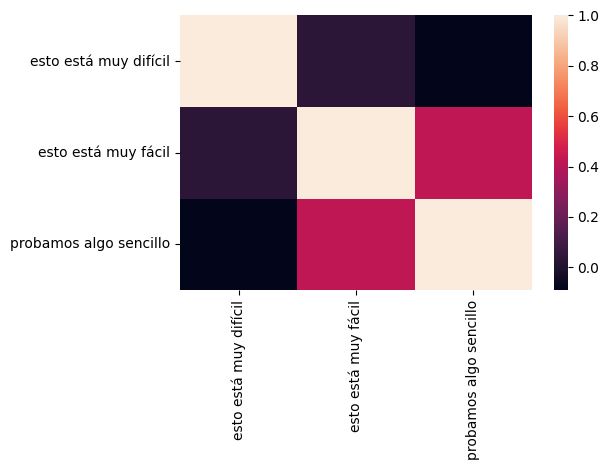

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(sim, index=texts, columns=texts))
fig.tight_layout()
fig.show()

## **3. Zero-Shot Classification**
---

La clasificación zero-shot en procesamiento de lenguaje natural es una técnica de aprendizaje automático que permite a un modelo clasificar una entrada en una categoría para la cual no se proporcionó ningún ejemplo de entrenamiento.

<img src="https://drive.google.com/uc?export=view&id=1hDhi_w8qQqHI0-GTQrPLP5GnikMWyGEg" width="80%">

En otras palabras, el modelo se entrena con un conjunto de categorías o de forma no supervisada (_AutoEncoders_ o _embeddings_), y luego se le presentan entradas desconocidas para las que se espera que el modelo asigne una categoría. Es una técnica utilizada para clasificar entidades desconocidas, utilizando información semántica previamente aprendida.

Esto se logra mediante el uso de representaciones semánticas de las palabras o frases, que se aprenden a través de técnicas como la codificación de contexto automática o el aprendizaje de embeddings de palabras. Estas representaciones se utilizan para encontrar relaciones semánticas entre las palabras de las entradas desconocidas y las categorías conocidas, permitiendo al modelo asignar una categoría a la entrada.

En resumen, la clasificación zero-shot en procesamiento de lenguaje natural es una técnica avanzada que permite a los modelos clasificar entradas en categorías para las cuales no se proporcionó ningún ejemplo de entrenamiento, utilizando información semántica previamente aprendida.

Veamos un ejemplo con `transformers`, instanciamos un modelo:

In [ ]:
model = pipeline("zero-shot-classification", "Recognai/bert-base-spanish-wwm-cased-xnli")

config.json:   0%|          | 0.00/834 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/528 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Definimos un texto que deseamos clasificar:

In [ ]:
text = "el algoritmo markov chain monte carlo nos permite obtener muestras de cualquier distribución de probabilidad"

Definimos las posibles etiquetas en las que deseamos clasificarlo:

In [ ]:
labels = ["política", "computación", "estadística", "gastronomía", "automóviles"]

Veamos las predicciones del modelo:

In [ ]:
res = model(text, candidate_labels=labels)
display(res)

{'sequence': 'el algoritmo markov chain monte carlo nos permite obtener muestras de cualquier distribución de probabilidad',
 'labels': ['estadística',
  'computación',
  'política',
  'automóviles',
  'gastronomía'],
 'scores': [0.3281761705875397,
  0.2960383892059326,
  0.14498451352119446,
  0.1428544968366623,
  0.08794645220041275]}

El resultado contiene los siguientes campos:

- `sequence`: texto utilizado.
- `labels`: etiquetas ordenadas de mayor a menor coincidencia.
- `scores`: predicción de cada una de las etiquetas obtenidas.

En este caso podemos ver que las dos categorías más probables son `estadística` y `computación`.

## **4. Generación de Texto**
---

Los modelos generativos basados en `transformers` son un tipo de modelo generativo del lenguaje que utiliza la arquitectura transformer para generar texto. Los modelos transformer son una variante de las redes neuronales recurrentes que utilizan atención para procesar secuencias de entrada de longitud variable.

Veamos un ejemplo de generación de texto automática:

In [ ]:
#@markdown ##**Ejecute esta celda para ver el video.**
from IPython.display import IFrame
IFrame(
        src="https://drive.google.com/file/d/1XTEbe7WElxWfaVouuNXZSUtvBhljzCY6/preview",
        width="768px",
        height="432px"
        )

Los modelos generativos basados en `transformers` se entrenan mediante un proceso donde se les proporciona un corpus de texto de entrenamiento y se les solicita que generen texto nuevo que siga la misma distribución. Durante el entrenamiento, el modelo aprende a representar las palabras y frases en el corpus de entrenamiento como vectores, y también aprende a generar texto nuevo mediante la decodificación de estos vectores.

Una vez entrenado, el modelo puede ser utilizado para generar texto nuevo de forma autónoma, ya sea mediante la generación de texto a partir de un fragmento de texto inicial o en diversas aplicaciones como pregunta-respuesta o agentes conversacionales.

Veamos un ejemplo con `transformers`:

In [ ]:
model = pipeline("text2text-generation", "flax-community/gpt-2-spanish")

config.json:   0%|          | 0.00/811 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/510M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.46M [00:00<?, ?B/s]

Definimos un texto base que usaremos para la generación:

In [ ]:
text = "Hola, me llamo Juan y trabajo como"

Veamos la generación de 100 tokens nuevos:

In [ ]:
res = model(text, max_new_tokens=100)
print(res[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Hola, me llamo Juan y trabajo como diseñador gráfico y desarrollo web, así que me gustaría participar en una campaña de marketing para promover la venta de camisetas del FC Barcelona durante el año 2018. Para más información llamar al 627545545.
Si eres un usuario de los canales en donde ya he puesto esto, como en la página principal, y quieres saber cómo participar con nosotros haz click aquí.
Si te gustó esta imagen por favor compártela en


## **Recursos Adicionales**
---

Los siguientes enlaces corresponden a sitios donde encontrará información muy útil para profundizar en los temas vistos en este taller guiado:

- [Sentence Transformers](https://www.sbert.net/).
- [Zero-Shot Classification](https://huggingface.co/tasks/zero-shot-classification).
- [Text Generation](https://huggingface.co/tasks/text-generation).

## **Créditos**

* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistentes docentes:**
    - [Juan Sebastián Lara Ramírez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](mailto:rsuperlano@unal.edu.co).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*